The data set is available at
http://yuedong.faculty.pstat.ucsb.edu/classes/data/property.txt

In [156]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
matplotlib.style.use('ggplot')

In [157]:
data = pd.read_csv("property.csv")
data

,size,age,dc,dt,price
0,102.2,4.1,0.8,50.2,472.0
1,102.7,16.0,5.5,51.4,660.1
2,101.1,6.8,14.7,29.1,683.0
3,121.2,18.0,6.5,66.2,473.2
4,102.9,17.0,10.4,43.8,593.0
...,...,...,...,...,...
78,116.8,8.5,14.1,74.2,416.4
79,107.7,16.7,19.7,3.1,917.6
80,94.1,5.1,21.9,9.0,583.8
81,106.5,10.2,9.5,12.3,595.1


In [158]:
data.describe()

,size,age,dc,dt,price
count,83.000000,83.000000,83.000000,83.000000,83.000000
mean,99.062651,11.940964,14.154217,34.022892,600.037349
std,15.853158,9.390161,6.522032,19.252408,150.915386
min,69.300000,2.200000,0.300000,3.100000,311.600000
25%,86.100000,4.300000,9.800000,18.850000,486.700000
50%,101.600000,8.800000,13.900000,31.200000,589.900000
75%,111.000000,16.850000,18.000000,49.300000,691.350000
max,134.800000,49.700000,29.000000,74.200000,1005.500000


In [159]:
data.dtypes

size     float64
age      float64
dc       float64
dt       float64
price    float64
dtype: object

<AxesSubplot:>

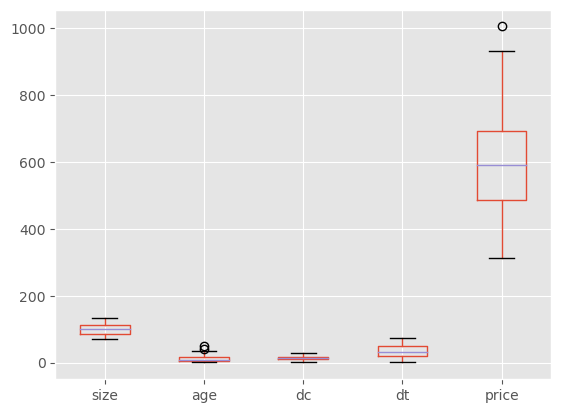

In [160]:
data.boxplot(column=['size','age', 'dc', 'dt', 'price'])

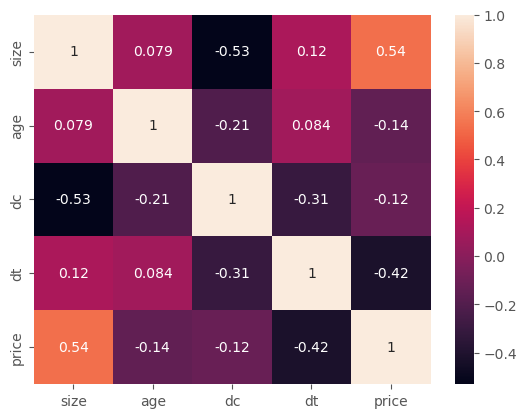

In [161]:
correlation_mat = data.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

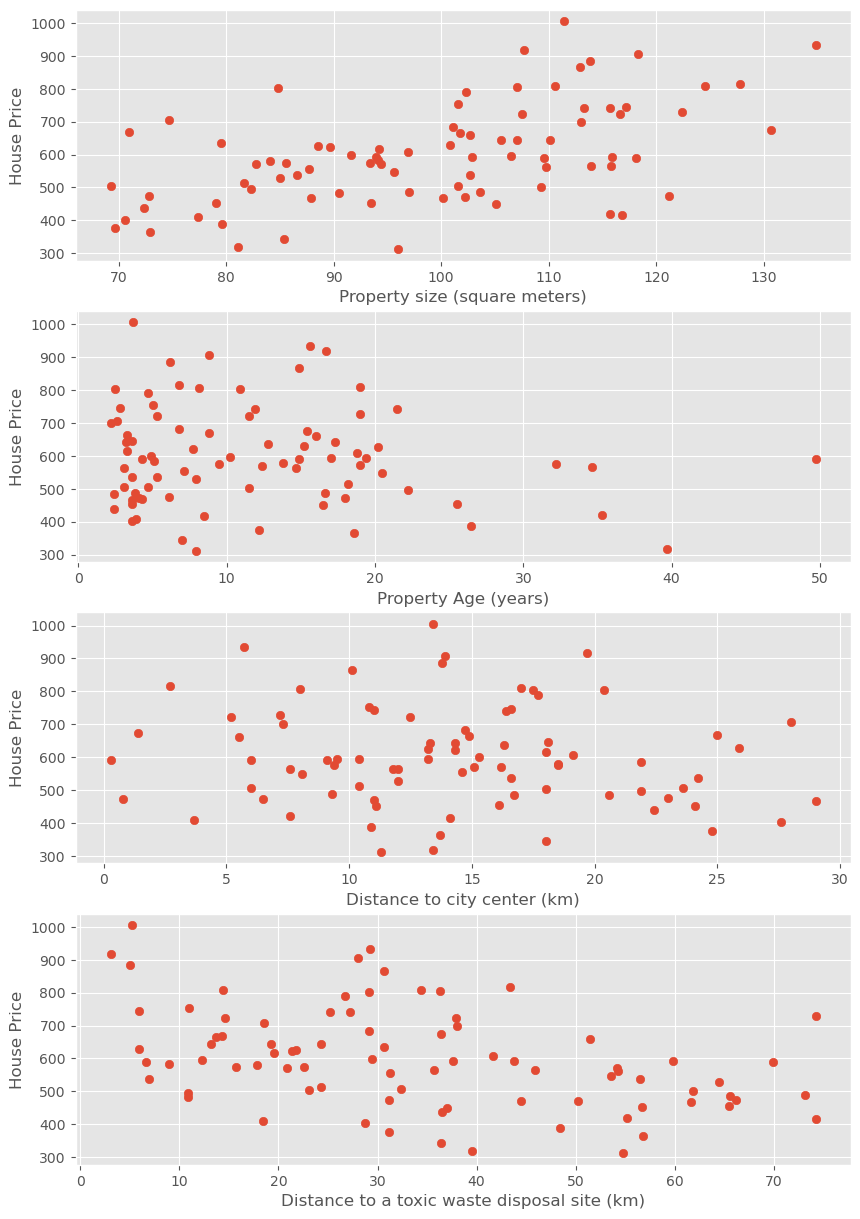

In [162]:
fig, ax = plt.subplots(4, figsize=(10, 15))
ax[0].scatter(x = data['size'], y = data['price'])
ax[0].set_xlabel("Property size (square meters)")
ax[0].set_ylabel("House Price")

ax[1].scatter(x = data['age'], y = data['price'])
ax[1].set_xlabel("Property Age (years)")
ax[1].set_ylabel("House Price")

ax[2].scatter(x = data['dc'], y = data['price'])
ax[2].set_xlabel("Distance to city center (km)")
ax[2].set_ylabel("House Price")

ax[3].scatter(x = data['dt'], y = data['price'])
ax[3].set_xlabel("Distance to a toxic waste disposal site (km)")
ax[3].set_ylabel("House Price")

plt.show()

## Multiple Linear Regression

In [163]:
X = pd.DataFrame(data.iloc[:,:-1])
y = pd.DataFrame(data.iloc[:,-1])

In [164]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=5)

In [165]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(66, 4)
(17, 4)
(66, 1)
(17, 1)


In [166]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [167]:
#display regression coefficients and R-squared value of model
print(regressor.intercept_, regressor.coef_, regressor.score(X, y))

[102.60994322] [[ 6.25365666 -1.94917065  1.72844913 -3.49334881]] 0.5499552328037014


In [168]:
v = pd.DataFrame(regressor.coef_, index=['Coefficient']).transpose()
w = pd.DataFrame(X.columns, columns = ['Attribute'])

In [169]:
coeff_df = pd.concat([w,v], axis=1, join='inner')
coeff_df

,Attribute,Coefficient
0,size,6.253657
1,age,-1.949171
2,dc,1.728449
3,dt,-3.493349


In [170]:
y_pred = regressor.predict(X_test)
y_pred = pd.DataFrame(y_pred, columns=['Predicted'])
y_pred

,Predicted
0,484.547174
1,708.476020
2,577.655654
3,727.507215
4,702.569552
5,584.403825
6,526.982215
7,461.906705
8,578.942282
9,680.791945


In [171]:
y_test

,price
45,402.4
10,753.2
24,420.0
52,629.1
23,741.7
34,469.3
48,343.8
20,438.5
26,502.5
12,564.4


In [172]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 98.71969009241049
Mean Squared Error: 12330.059182962192
Root Mean Squared Error: 111.04079963221713


## Multiple Linear Regression with Higher Order Term

In [173]:
# Include squared terms
X_poly = pd.DataFrame([data["size"],
                       data["age"],
                       data["dc"], 
                       data["dt"],
                       data['age']**2]).T

In [174]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size=0.2, random_state=5)

In [175]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(66, 5)
(17, 5)
(66, 1)
(17, 1)


In [176]:
from sklearn.linear_model import LinearRegression
regressor1=LinearRegression()
regressor1.fit(X_train, y_train)

LinearRegression()

In [178]:
#display regression coefficients and R-squared value of model
print(regressor1.intercept_, regressor1.coef_, regressor1.score(X_poly, y))

[83.05686656] [[ 6.22046158  3.82731889  1.63280789 -3.81052626 -0.14950611]] 0.5761508627263799


In [179]:
v = pd.DataFrame(regressor1.coef_, index=['Coefficient']).transpose()
w = pd.DataFrame(X_poly.columns, columns = ['Attribute'])

In [180]:
coeff_df = pd.concat([w,v], axis=1, join='inner')
coeff_df

,Attribute,Coefficient
0,size,6.220462
1,age,3.827319
2,dc,1.632808
3,dt,-3.810526
4,age,-0.149506


In [181]:
y_pred = regressor1.predict(X_test)
y_pred = pd.DataFrame(y_pred, columns=['Predicted'])
y_pred

,Predicted
0,469.765597
1,706.173241
2,553.638846
3,753.520368
4,724.145054
5,568.432688
6,524.437104
7,439.233383
8,581.095320
9,658.178230


In [182]:
y_test

,price
45,402.4
10,753.2
24,420.0
52,629.1
23,741.7
34,469.3
48,343.8
20,438.5
26,502.5
12,564.4


In [183]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 92.03079004213086
Mean Squared Error: 11129.088753312346
Root Mean Squared Error: 105.49449631763899


### Get Regression Model Summary from Statsmodels

In [184]:
import statsmodels.api as sm


#add constant to predictor variables
x = sm.add_constant(X)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     24.13
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           5.16e-13
Time:                        21:55:22   Log-Likelihood:                -500.23
No. Observations:                  83   AIC:                             1010.
Df Residuals:                      78   BIC:                             1023.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        157.8790    111.792      1.412      0.1

In [185]:
#add constant to predictor variables
X_poly = pd.DataFrame([data["size"],
                       data["age"],
                       data["dt"],
                       data['age']**2]).T
x_poly = sm.add_constant(X_poly)

#fit linear regression model
model = sm.OLS(y, X_poly).fit()

#view model summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.974
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              732.2
Date:                Tue, 31 Jan 2023   Prob (F-statistic):                    1.45e-61
Time:                        21:56:33   Log-Likelihood:                         -500.20
No. Observations:                  83   AIC:                                      1008.
Df Residuals:                      79   BIC:                                      1018.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------